In [2]:
import sys
import os
import math
import time
import pandas as pd
import numpy as np
from scipy import constants
import seaborn as sb
import matplotlib.pyplot as plt
from spectral import *
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

h = constants.h
c = constants.c
e = math.e
pi = math.pi
k = constants.k

def load_flux(fluxname):

    with open(fluxname, 'r') as file:
        data = file.readlines()
        size = len(data)
        flux,wavelengths = [],[]
        for i in range(size):
            flux.append(float(data[i].strip().split("\t")[1]))
            wavelengths.append(float(data[i].strip().split("\t")[0]))

    return flux,wavelengths

def rad_list(xp,yp):
    rad = np.zeros(len(wavelengths))
    for i in range(len(wavelengths)):
        rad[i] = img_open[xp,yp,i+5]
    
    return rad

In [3]:
filename = '20191202/ch2_iir_nci_20191202T0639493114_d_img_d18'

In [4]:
start = time.time()

# Load solar flux
flux,wavelengths = load_flux('IIRS_ConvFlux.txt')
print
wavelengths = wavelengths[:250]
# Load spectrum data
img = envi.open(filename + '.hdr', image = filename + '.qub')
# print(img)

# Data in 3D-array 
img_open = img.open_memmap(writeable = False)

def plot(x,y):
    # Radiance
    rad = img_open[x,y,:]
    plt.plot(np.arange(0,256,1), rad)
    ################### Reflectance #######################
    # ref = rad/flux[:250]
    
def scatter(x,y):
    # Radiance
    rad = img_open[x,y,:250]
    plt.scatter(wavelengths, rad, marker='x')
img_open.shape

(10756, 250, 256)

<AxesSubplot:>

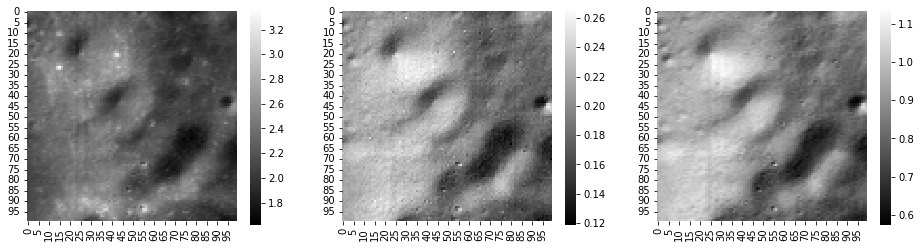

In [5]:
figure, axis = plt.subplots(1, 3)
figure.set_figheight(4)
figure.set_figwidth(16)
sb.heatmap(img_open[-120:,-120:,25][:100,:100], ax=axis[0], square=True, cmap='gray')
sb.heatmap(img_open[-120:,-120:,140][:100,:100], ax=axis[1], square=True, cmap='gray')
sb.heatmap(img_open[-120:,-120:,225][:100,:100], ax=axis[2], square=True, cmap='gray')

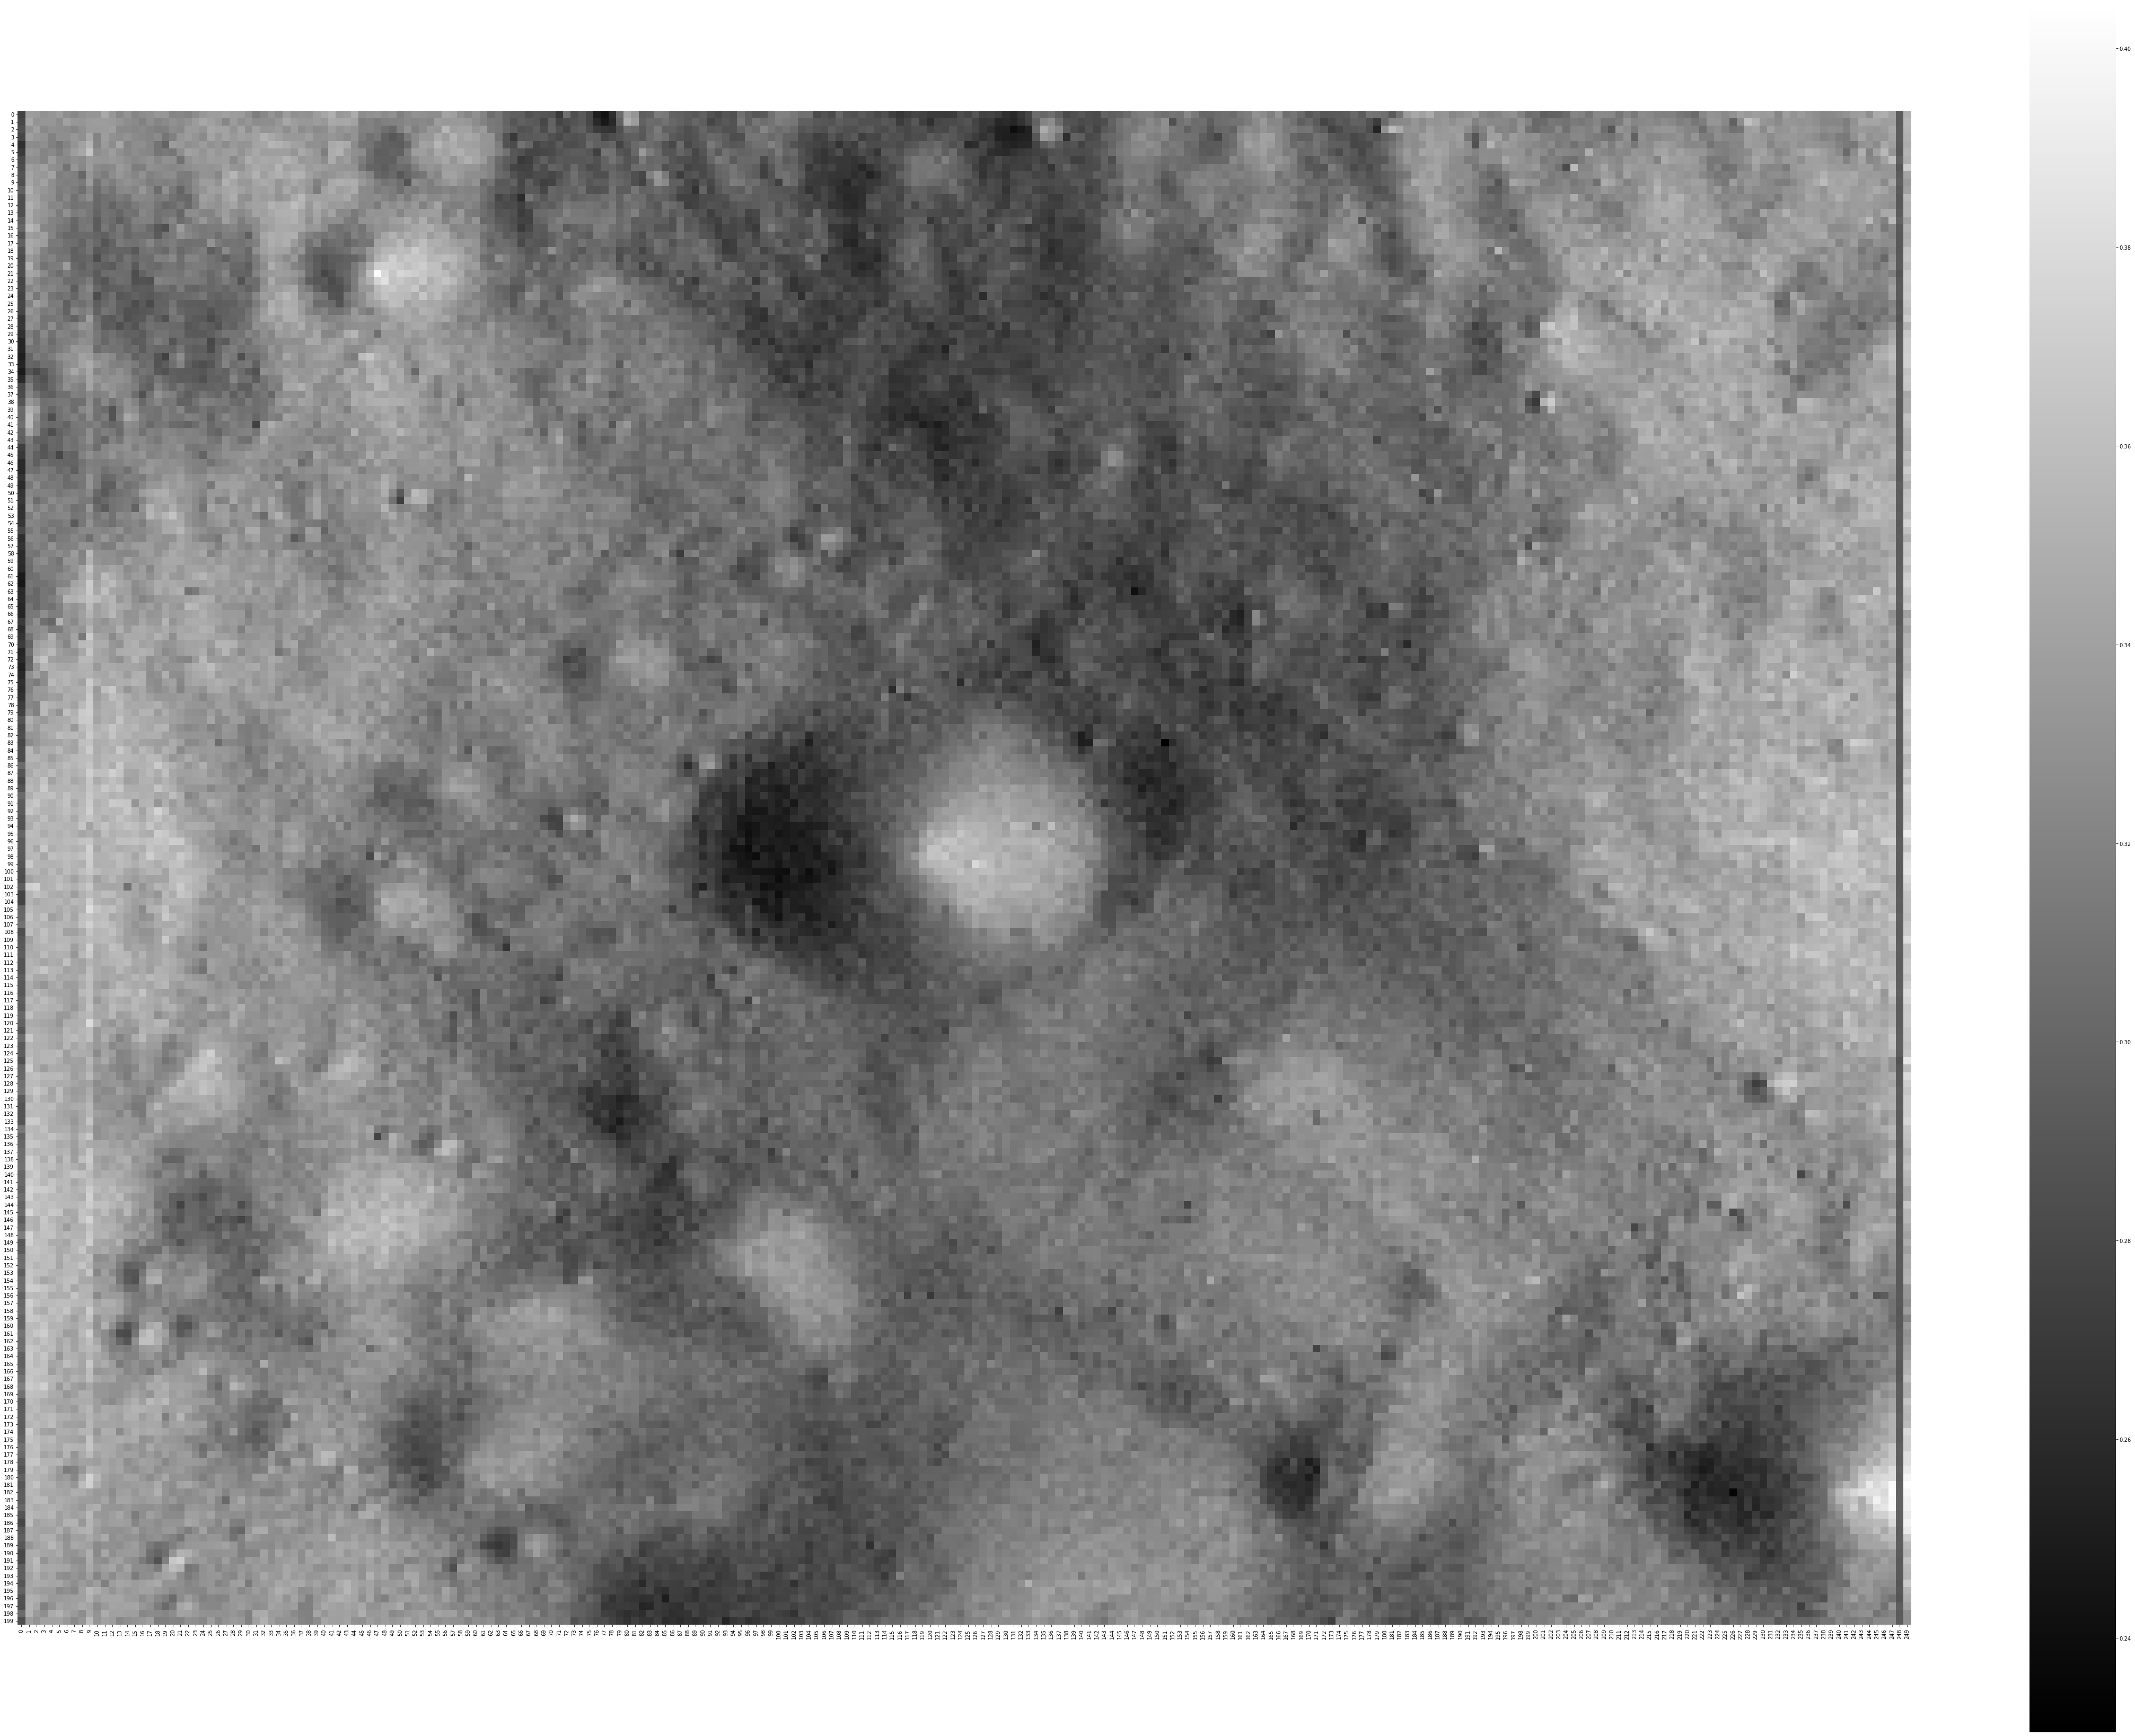

In [38]:
plt.figure(figsize = (80,60))

sb.heatmap(img_open[:200,:,160], square=True, cmap='gray')
plt.savefig('image.jpg')

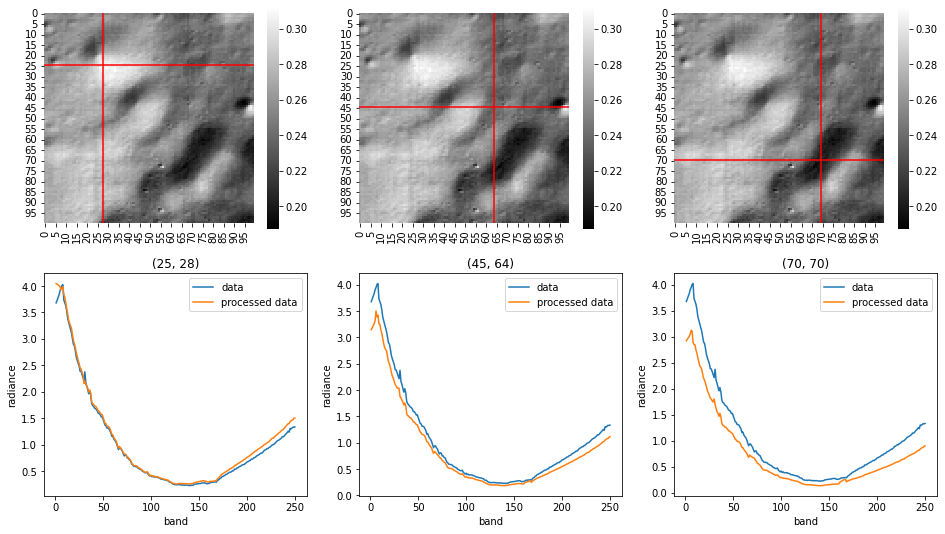

In [35]:
filename_processed = '/home/nelsonksh/Documents/SmallTest/Results/R213/X/X'
img_processed = envi.open(filename_processed + '.hdr', image = filename_processed + '.img')
img_open_processed_initial = img_processed.open_memmap(writeable = False)
img_open_processed = img_open_processed_initial[:,:,:]
figure, axis = plt.subplots(2, 3)
figure.set_figheight(9)
figure.set_figwidth(16)
sb.heatmap(img_open_processed[-120:,-120:,160][:100,:100], ax=axis[0,0], square=True, cmap='gray')
axis[0,0].axhline(y=25, color='r', linestyle='-')
axis[0,0].axvline(x=28, color='r', linestyle='-')
sb.heatmap(img_open_processed[-120:,-120:,160][:100,:100], ax=axis[0,1], square=True, cmap='gray')
axis[0,1].axhline(y=45, color='r', linestyle='-')
axis[0,1].axvline(x=64, color='r', linestyle='-')
sb.heatmap(img_open_processed[-120:,-120:,160][:100,:100], ax=axis[0,2], square=True, cmap='gray')
axis[0,2].axhline(y=70, color='r', linestyle='-')
axis[0,2].axvline(x=70, color='r', linestyle='-')

def plott(y1, x1, file, axs, name=None):
    # Radiance
    rad = file[y1,x1,:]
    axs.plot(np.arange(1,251,1), rad, label=name)

point = [(25,28),(45,64),(70,70)]
k = 0
for j in point:
    plott(10661,151, img_open[:,:,:250], axis[1,k], 'data')
    plott(j[0],j[1], img_open_processed, axis[1,k], 'processed data')
    axis[1,k].set_title(str(j))
    axis[1,k].set_xlabel('band')
    axis[1,k].set_ylabel('radiance')
    axis[1,k].legend()
          
    k = k+1
plt.savefig("comparison.jpg")

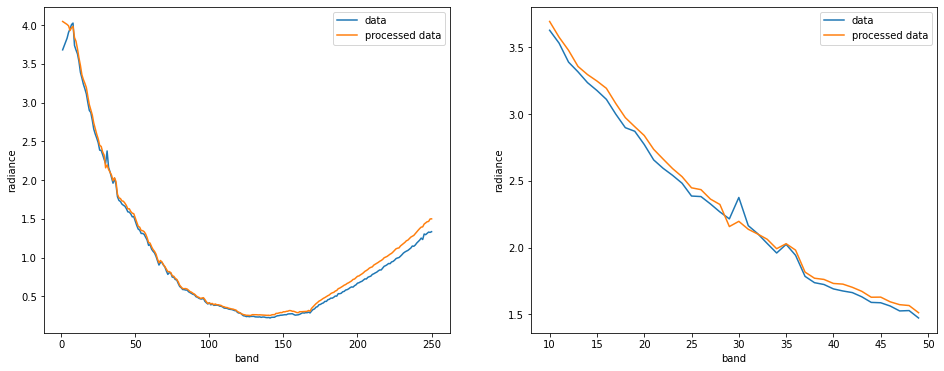

In [41]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(6)
figure.set_figwidth(16)
plott(10661,151, img_open[:,:,:250], axis[0], 'data')
plott(25,28, img_open_processed, axis[0], 'processed data')

axis[0].set_xlabel('band')
axis[0].set_ylabel('radiance')
axis[0].legend()

def plott2(y1, x1, file, axs, name=None):
    # Radiance
    rad = file[y1,x1,:][10:50]
    axs.plot(np.arange(10,50,1), rad, label=name)
plott2(10661,151, img_open[:,:,:250], axis[1], 'data')
plott2(25,28, img_open_processed, axis[1], 'processed data')

axis[1].set_xlabel('band')
axis[1].set_ylabel('radiance')
axis[1].legend()
plt.savefig("zoom.jpg")

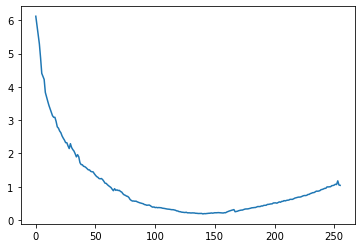

In [5]:
###### PLOT RADIANCE VS BAND #######

plot(100,100)

In [6]:
###### SCATTER RADIANCE VS BAND #######

# scatter(100,100)

In [7]:
# ###### WHOLE MAP ########
# band = 230

# sb.heatmap(img_open[:,:,band], square=True, cmap='gray')

<AxesSubplot:>

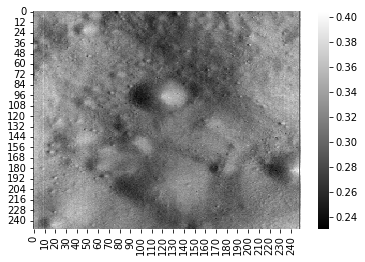

In [29]:
###### MAP ########
horizontal = (0, 250) # index from 0 to 250
vertical = (0, 10755) # index from 0 to 10755
band = 160 # index form 0 to 251

# plt.figure(figsize = (50 * (vertical[1] - vertical[0])/ (horizontal[1] - horizontal[0]), 50))


sb.heatmap(img_open[horizontal[0]:horizontal[1],
                    vertical[0]:vertical[1],
                    band], square=False, cmap='gray')

In [9]:
# ###### HORIZONTAL STRIPS VS BAND ########
# horizontal = (0, 100) # index from 0 to 250
# vertical = 12 # index from 0 to 10755
# band = (0,251) # index form 0 to 251

# sb.heatmap(img_open[horizontal[0]:horizontal[1],
#                     vertical,
#                     band[0]:band[1]],
#            square=True,
#            cbar=False,
# #            xticklabels=False,
# #            yticklabels=False
#           )
# # plt.savefig("test.eps")

In [10]:
# ###### VERTICAL STRIPS VS BAND ########
# horizontal = 12 # index from 0 to 250
# vertical = (50, 100) # index from 0 to 10755
# band = (150,180) # index form 0 to 251

# sb.heatmap(img_open[horizontal,
#                     vertical[0]:vertical[1],
#                     band[0]:band[1]],
#            square=True,
#            cbar=False,
# #            xticklabels=False,
# #            yticklabels=False
#           )
# # plt.savefig("test_vertical.eps")
